ModuleNotFoundError: No module named 'google'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [2]:
data=pd.read_csv('COVID-19_Sentiments.csv')
data.head()
dataset=data.iloc[:,1:].values


In [3]:
dataset[0]

array(["RT @theskindoctor13: Shaheen Bagh is still on.\n\nMosques are open.\n\nMuIIahs are saying Corona won't harm if you read qalma.\n\nTiktokiye are m…",
       'Fri Mar 20 16:04:27 +0000 2020', 'Uttar Pradesh, India', 0.0],
      dtype=object)

In [5]:
dataset.shape

(648958, 4)

In [6]:
data1=[]
y=[]

In [7]:
for i in range (0,648958):
  if(dataset[i][0][0]=='R' and dataset[i][0][1]=='T'):
    continue
  else:
    data1.append(dataset[i][0])
    y.append(dataset[i][3])


In [8]:
len(y)

177546

In [9]:
for i in range(0,177546):
  if(y[i]>0.0000000):
    y[i]=1
  else:
    y[i]=0

In [10]:
len(data1)

177546

In [11]:
set(y)

{0, 1}

In [12]:
import seaborn as sns

C:\Users\Ishita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

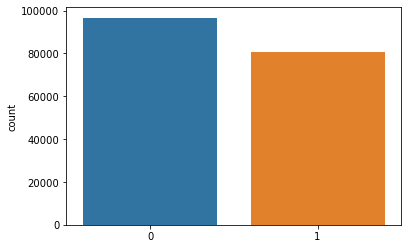

In [17]:
sns.countplot(y)

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,177546):
  review = re.sub('[^a-zA-Z]', ' ', data1[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


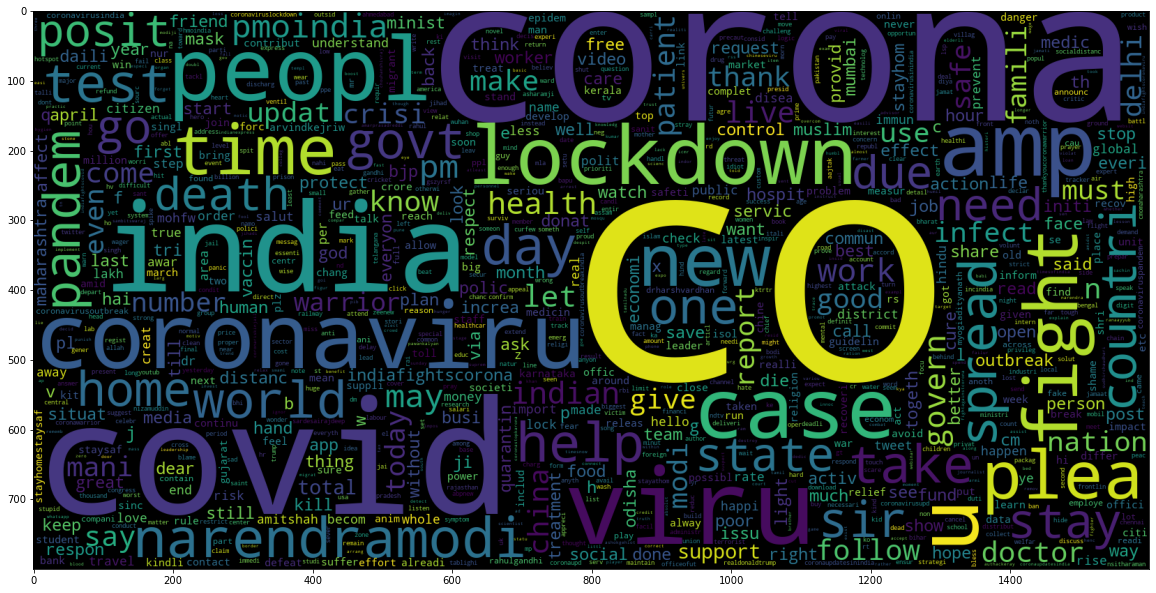

In [14]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [15]:
corpus

['ghmconlin cphydciti ministerktr eatala rajend think restaur must close hyderabad restrict peopl gather pleas take necessari action restaur remain open sincer thank work stop corona viru http co rjw r wdmd',
 'delhi govern pay salari contract worker daili wage labour guest teacher etc whose offic declar close order relat corona viru msisodia http co kxjwwagc b',
 'nitinbhatia ngo save suffer human corona',
 'us particip janata curfew propos http co ay bkjuwi defin help deter corona advanc jai hind',
 'must watch strong messag coronavirusindia corona gayac vvi bihar http co izwdnsufh',
 'thekanikakapoor deserv coz neglig push mani import live risk whole lucknow bdutt http co q vv h l',
 'corona viru realis citizen countri want fli nativ countri countri soil safeguard citizen time w h red cross societi motherthersa institut social institut play role erad corona viru',
 'corona tell us take precaut c clean hand gather r rais immun offer mask poor peopl n hand shake avoid rumour take care

In [16]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=400)
x = hv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)


In [17]:
from sklearn.tree import DecisionTreeClassifier 
classifier6=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)
y_pred6=classifier6.predict(x_test)

[[9504  268]
 [ 284 7699]]


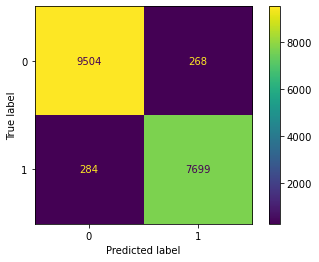

0.9689101661503802
0.9685854953170375
0.9686730597798469
0.9684995525438344
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9772
           1       0.97      0.96      0.97      7983

    accuracy                           0.97     17755
   macro avg       0.97      0.97      0.97     17755
weighted avg       0.97      0.97      0.97     17755

0.9684995525438344


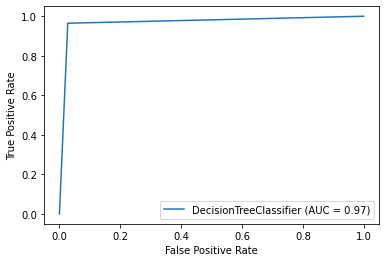

In [24]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
plot_confusion_matrix(classifier6,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred6))
print(f1_score(y_test, y_pred6,average='macro'))
print(precision_score(y_test,y_pred6,average='macro'))
print(recall_score(y_test,y_pred6,average='macro'))
print(classification_report(y_test, y_pred6))
print(roc_auc_score(y_test,y_pred6,average='macro'))

plot_roc_curve(classifier6,x_test,y_test)
plt.show()

In [18]:
s1= " i mfeeling sad today "

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0,1):
  review = re.sub('[^a-zA-Z]', ' ', s1)
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus1.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
corpus1

['mfeel sad today']

In [20]:
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.20412415,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.21320072],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv1 = CountVectorizer(max_features = 400)
x_sample = hv.fit_transform(corpus1).toarray()

In [50]:
#cv1 = CountVectorizer(max_features = 400)
#x_sample = cv1.fit_transform(np.array(corpus1)).toarray()

In [23]:
x_sample.shape

(1, 400)

In [24]:
from sklearn.feature_extraction.text import HashingVectorizer
text = corpus1
vectorizer = HashingVectorizer(n_features=400)
vector = vectorizer.transform(text)

In [25]:
for i in range(1,400):
  x_sample[0]

In [26]:
pdt=classifier6.predict(vector)

In [27]:
pdt

array([0])

In [44]:
vector

<1x400 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [4]:
!pip install wordcloud